#### Лабораторная работа №4.
#### Ковалёва Елена. 20152.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
import pandas_profiling as pp

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
houses = pd.read_csv('data.csv')
##загружаем Dataset и смотрим его значения.

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
houses.shape

(4600, 18)

В нашем Dataset левая часть показывает количество домов-4600.
В правой колонке набор данных-18.
Пропущенных значений-0.

In [6]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
#Столбцы street,data,country-удалить,т.к. не имеют важного значения для цены на дома.
houses=houses.drop(['date'], axis = 1)
houses=houses.drop(['country'], axis = 1)
houses=houses.drop(['street'],axis =1)
houses.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [8]:
print('Длина до обработки:',len(houses))
count, list_drop = 0, []
for i in range(len(houses)):
    if houses['price'][i] == 0:
        houses.drop(i, inplace = True)
        count += 1

print('Пропущенные значения:', count)
print('Длина после обработки:',len(houses))

Длина до обработки: 4600
Пропущенные значения: 49
Длина после обработки: 4551


In [9]:
##Теперь мы всё загружаем в одну колонку с помощью One-hot-encode.
houses_endcode=pd.get_dummies(houses)
houses_endcode.head(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0


In [10]:
houses.shape

(4551, 15)

In [11]:
X = houses.iloc[:, 1:]
X.shape

(4551, 14)

In [12]:
#После того, как получили нужные нам данные. Нам остается их разбить на контрольную и обучащую выборку.
houses.shape
X =np.array(houses_endcode)[:, 1:]
Y =np.array(houses_endcode)[:,0]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,shuffle=False)

In [13]:
model= sm.OLS(Y_train,X_train)
ols=model.fit()

y_test_ols=ols.predict(X_test)
rmse=0#RMSE-среднеквадратичное отклонение нужно для вывода ошибок предсказаний
for i in range(len(Y_test)):
    rmse+=(Y_test[i]-y_test_ols[i])**2
rmse=math.sqrt(rmse/len(Y_test))
print('Ошибка предсказаний =',rmse)

Ошибка предсказаний = 991125.3911514686


#### 2.Исследуем значимость модели и коэффициентов линейной регрессии.

In [14]:
houses = sm.OLS(Y_train, X_train)
res = houses.fit()
print(res.summary())
#С помощью метода наименьшых квадратов выводим нашу обучающую выборку для оценки параметров
##неизвестной модели линейной регрессии.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     141.2
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:56:14   Log-Likelihood:                -48793.
No. Observations:                3640   AIC:                         9.780e+04
Df Residuals:                    3534   BIC:                         9.845e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.049e+04   4019.714     -7.584      0.0

In [15]:
#Выводом P>|t|:
print(ols.pvalues)
y=ols.tvalues
x=[] 

[4.24539098e-014 2.43869710e-003 1.75961925e-257 7.60877577e-001
 2.51290018e-008 7.36114269e-067 3.02498299e-043 1.37384414e-008
 1.31980499e-185 2.76132878e-002 1.53827088e-001 2.76393809e-001
 4.64039257e-001 3.72430488e-001 6.97225865e-001 3.22526839e-002
 2.61225157e-001 2.16633672e-001 9.55219548e-002 2.34211484e-001
 5.17094497e-002 3.58246709e-001 1.08656882e-001 2.81168665e-001
 4.05843708e-001 1.96725644e-001 5.93262296e-001 2.04691791e-001
 1.42243521e-001 3.44805714e-001 4.32049542e-001 7.84003929e-002
 2.53973252e-001 3.80013612e-001 1.97714388e-007 8.55530726e-003
 2.84455360e-001 1.61088405e-001 4.11207945e-002 2.78394246e-001
 3.95068764e-001 2.61799692e-001 3.39525880e-001 1.89091039e-001
 3.77828435e-001 1.42459394e-001 9.24070653e-002 7.83417363e-002
 1.76768895e-001 4.44292975e-001 3.11219548e-001 1.48461306e-001
 1.09221820e-001 5.34538839e-001 1.82851945e-001 5.30891795e-004
 4.65418729e-001 5.54175578e-001 2.89741148e-001 3.13100192e-007
 9.65345198e-002 1.605574

Заметим, что в нашей модели данных cуществуют (coef, std err, t, P>|t|,[0.025 0.975]). Рассмотрев колонку под  P>|t|, то там коэффициент  P>|t|=0.00==>эти переменные не влияют на цену дома.

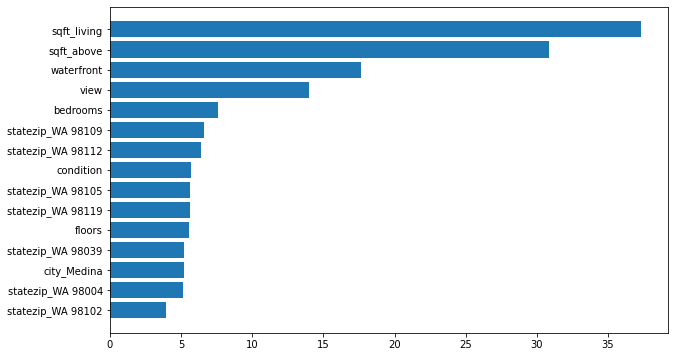

In [16]:
names=[]
params=[]

params=sorted(abs(ols.tvalues.copy()))[len(params)-15:]
              
for elem in params:
    index=list(abs(ols.tvalues)).index(elem)
    names.append((houses_endcode.columns[1:])[index])

plt.figure(figsize=(10,6))
plt.barh(names,params)
plt.show()

Самые важные признаки:sqft_living,sqft_above,waterfront,view,bedrooms.

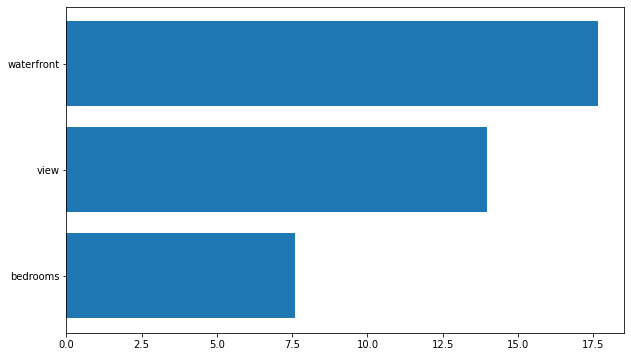

In [17]:
#выводим waterfront,view и bedrooms:
names=[]
params=[]

params=sorted(abs(ols.tvalues.copy()))[len(params)-15:]
a=[params[10],params[11],params[12]]              
for elem in a:
    index=list(abs(ols.tvalues)).index(elem)
    names.append((houses_endcode.columns[1:])[index])

plt.figure(figsize=(10,6))
plt.barh(names,a)
plt.show()

#### 3. Строим решения методом бустинга. Сравниваем полученные результаты с линейной регрессией.

In [18]:
boost=GradientBoostingRegressor(random_state=0,n_estimators=10,max_depth=11)
boost.fit(X_train,Y_train)
y_test_boost=boost.predict(X_test)

In [19]:
rmse=0
for i in range(len(Y_test)):
    rmse+=(Y_test[i] - y_test_boost[i])**2
rmse=math.sqrt(rmse/len(Y_test))
print("Ошибка=",rmse)

Ошибка= 993768.8511497166


Ошибка линейной регрессии=1010994.6465697095
Ошибка бустинга=1003693.5702543714
Вывод:Градиентовый бустинг работает лучше.

#### 4. Строим графики полученных зависимостей для наиболее информативных переменных (отобразить на одном графике линейную регрессию и решение, полученное бустингом).

Построить график для переменной sqft_above

Ошибка Линейной регрессии= 1015050.8964889284
Ошибка Градиентового бустинга = 1027881.8223831767


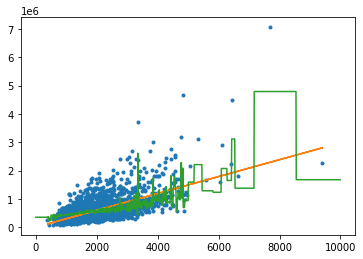

In [22]:
#plot_значение
x_range=X_train[:,8:9].copy()
plt.plot(x_range,Y_train, '.')

#plot_LinearReggression
model=sm.OLS(Y_train,x_range)
ols=model.fit()
ols_y=ols.predict(x_range)
plt.plot(x_range,ols_y)

y_test_ols=ols.predict(X_test[:,8:9])
rmse=0
for i in range(len(Y_test)):
    rmse+=(Y_test[i]-y_test_ols[i])**2
rmse=math.sqrt(rmse/len(Y_test))
print("Ошибка Линейной регрессии=",rmse)

#plot_GradientBossting
boost=GradientBoostingRegressor(random_state=0,n_estimators=10,max_depth=11)
boost.fit(x_range,Y_train)
y_boost=[]
x_arange= np.arange(0, 10000, 10)
for elem in x_arange:
    y_boost.append(boost.predict([[elem]]))
plt.plot(x_arange,y_boost)

y_test_boost=boost.predict(X_test[:,8:9])
rmse=0
for i in range(len(Y_test)):
    rmse+=(Y_test[i] - y_test_boost[i])**2
rmse=math.sqrt(rmse/len(Y_test))
print("Ошибка Градиентового бустинга =",rmse)

Вывод:Если посмотреть график, то можно увидеть, что Линейная регрессия справляется хуже, чем Градиентовый бустинг. Это говорит о том, что Градиентовый бустинг выдает намного лучше точность.
